In [1]:
from PIL import Image

def image_grid(imgs, rows, cols, resize=256):
    assert len(imgs) == rows * cols

    if resize is not None:
        imgs = [img.resize((resize, resize)) for img in imgs]

    w, h = imgs[0].size
    grid_w, grid_h = cols * w, rows * h
    grid = Image.new("RGB", size=(grid_w, grid_h))

    for i, img in enumerate(imgs):
        x = i % cols * w
        y = i // cols * h
        grid.paste(img, box=(x, y))

    return grid

In [2]:
from diffusers import DiffusionPipeline, AutoencoderKL, StableDiffusionXLImg2ImgPipeline

import torch

vae = AutoencoderKL.from_pretrained(
    "madebyollin/sdxl-vae-fp16-fix", 
    torch_dtype=torch.float16
)
pipe = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    vae=vae,
    torch_dtype=torch.float16,
    variant="fp16",
    use_safetensors=True,
)
pipe.to("cuda");
pipe.load_lora_weights("DreamboothSDXL-13", weight_name="pytorch_lora_weights.safetensors")
# so far errors in refiner with 04 and 13
# try without lora

refiner = StableDiffusionXLImg2ImgPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-refiner-1.0",
    vae=vae,
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16",
)
refiner.to("cuda");

2024-03-30 18:31:34.811087: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

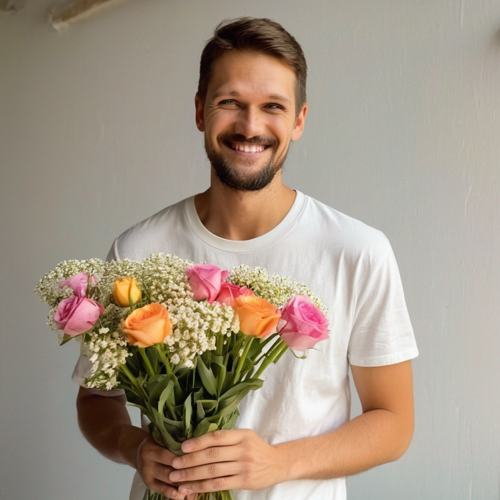

In [14]:
prompt = "sks man, happy, eyes open, holding flowers, standing, half-length photo"
# prompt = "sks man, happy, eyes open, standing tall, holding flowers, full-length color photo"
negative_prompt = "disfigured, ugly, bad, immature, cartoon, anime, 3d, painting, b&w"

seed = 40
generator = torch.Generator("cuda").manual_seed(seed)
image = pipe(prompt=prompt, generator=generator, num_inference_steps=50, negative_prompt=negative_prompt).images[0]
image.resize((500, 500))

  0%|          | 0/15 [00:00<?, ?it/s]

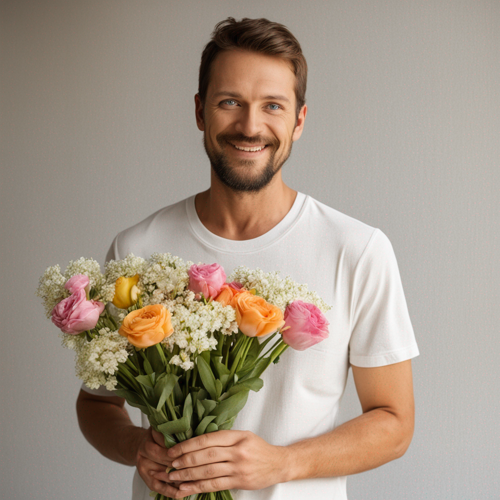

In [10]:
from IPython.display import display

# tried finding some specific params so the refiner doesn't remove my face -- but wasn't able
# need to dive into theory here to understand what happens behind the scenes
image_refined = refiner(prompt=prompt, num_inference_steps=50, generator=generator, image=image)
image_refined.images[0].resize((500, 500))

  0%|          | 0/7 [00:00<?, ?it/s]

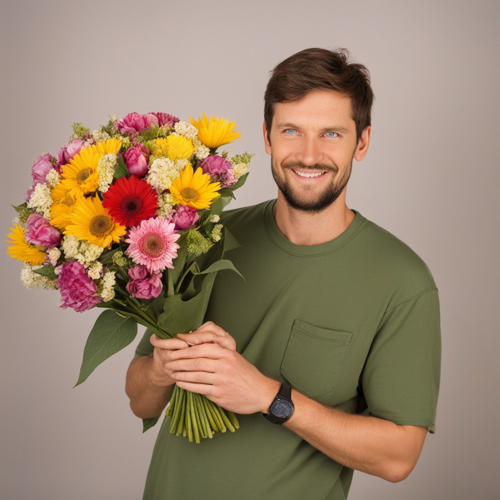

In [12]:
from IPython.display import display

# tried finding some specific params so the refiner doesn't remove my face -- but wasn't able
# need to dive into theory here to understand what happens behind the scenes
image_refined = refiner(prompt=prompt, num_inference_steps=25, generator=generator, image=image)
image_refined.images[0].resize((500, 500))

  0%|          | 0/7 [00:00<?, ?it/s]

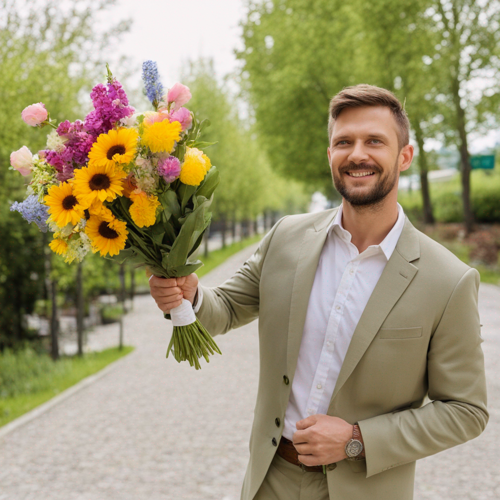

In [ ]:
from IPython.display import display

# tried finding some specific params so the refiner doesn't remove my face -- but wasn't able
# need to dive into theory here to understand what happens behind the scenes
image_refined = refiner(prompt=prompt, num_inference_steps=25, generator=generator, image=image)
image_refined.images[0].resize((500, 500))

In [18]:
?refiner.__call__

Signature:
refiner.__call__(
    prompt: Union[str, List[str]] = None,
    prompt_2: Union[str, List[str], NoneType] = None,
    image: Union[PIL.Image.Image, numpy.ndarray, torch.FloatTensor, List[PIL.Image.Image], List[numpy.ndarray], List[torch.FloatTensor]] = None,
    strength: float = 0.3,
    num_inference_steps: int = 50,
    timesteps: List[int] = None,
    denoising_start: Optional[float] = None,
    denoising_end: Optional[float] = None,
    guidance_scale: float = 5.0,
    negative_prompt: Union[str, List[str], NoneType] = None,
    negative_prompt_2: Union[str, List[str], NoneType] = None,
    num_images_per_prompt: Optional[int] = 1,
    eta: float = 0.0,
    generator: Union[torch._C.Generator, List[torch._C.Generator], NoneType] = None,
    latents: Optional[torch.FloatTensor] = None,
    prompt_embeds: Optional[torch.FloatTensor] = None,
    negative_prompt_embeds: Optional[torch.FloatTensor] = None,
    pooled_prompt_embeds: Optional[torch.FloatTensor] = None,
    neg